In [3]:
# Import of necessary libraries
import pathlib
import detl
import matplotlib.pyplot as plt

In [4]:
# Parsing of a a test data file
path_to_file = pathlib.Path('..', 'tests', 'testfiles', 'v4_NT-WMB-2.Control.csv')
ddata = detl.parse(path_to_file) # Currently (v0.1) parsing yields some warnings, but the essential data is there

scope None: Failed to parse block "Profile Columns"
scope 1: Failed to parse block "Requirements"
scope 1: Failed to parse block "Profiles"
scope 2: Failed to parse block "Requirements"
scope 2: Failed to parse block "Profiles"
scope 3: Failed to parse block "Requirements"
scope 3: Failed to parse block "Profiles"
scope 4: Failed to parse block "Requirements"
scope 4: Failed to parse block "Profiles"


In [6]:
# Let's look into the dict-like object, it should contain 4 ReactorData objects
ddata

{1: <detl.core.ReactorData at 0x2a37a273fd0>,
 2: <detl.core.ReactorData at 0x2a379d27f28>,
 3: <detl.core.ReactorData at 0x2a37a295b38>,
 4: <detl.core.ReactorData at 0x2a379d27c50>}

In [7]:
# A look into one of the dataframes, to get a feeling for the structure
ddata[1].dataframe.head()

,timestamp,duration,process_time,volume_pv,temperature_sp,temperature_pv,temperature_out,stirrer_speed_pv,stirrer_torque_pv,aeration_pv,...,pump_b_volume_pv,pump_c_rate_sp,pump_c_rate_pv,pump_c_volume_pv,pump_d_rate_sp,pump_d_rate_pv,pump_d_volume_pv,absorption_pv,turbidity_pv,level_pv
0,2016-03-09 15:38:31+00:00,0.008333,NaN,0.0,0.0,0.000,0.000,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000
1,2016-03-09 15:39:01+00:00,0.016667,NaN,1000.0,30.0,29.582,0.000,0.4,0.0,0.000,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,5.0,2073.809,5.545
2,2016-03-09 15:39:31+00:00,0.025000,NaN,1000.0,30.0,29.587,0.000,0.4,0.0,0.000,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,5.0,2073.809,5.545
3,2016-03-09 15:40:01+00:00,0.033333,NaN,1000.0,30.0,29.587,3.151,0.4,0.0,29.972,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,5.0,2073.809,5.545
4,2016-03-09 15:40:31+00:00,0.041667,NaN,1000.0,30.0,29.636,2.773,0.4,0.0,29.997,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,5.0,2073.809,5.545


In [9]:
# Here we list all column names
ddata[1].dataframe.columns

Index(['timestamp', 'duration', 'process_time', 'volume_pv', 'temperature_sp',
       'temperature_pv', 'temperature_out', 'stirrer_speed_pv',
       'stirrer_torque_pv', 'aeration_pv', 'ph_sp', 'ph_pv', 'ph_out', 'do_sp',
       'do_pv', 'do_out', 'off-gas_pv', 'off-gas_x_o2_pv', 'off-gas_x_co2_pv',
       'otr_pv', 'ctr_pv', 'rq_pv', 'pump_a_rate_sp', 'pump_a_rate_pv',
       'pump_a_volume_pv', 'pump_b_rate_pv', 'pump_b_volume_pv',
       'pump_c_rate_sp', 'pump_c_rate_pv', 'pump_c_volume_pv',
       'pump_d_rate_sp', 'pump_d_rate_pv', 'pump_d_volume_pv', 'absorption_pv',
       'turbidity_pv', 'level_pv'],
      dtype='object')

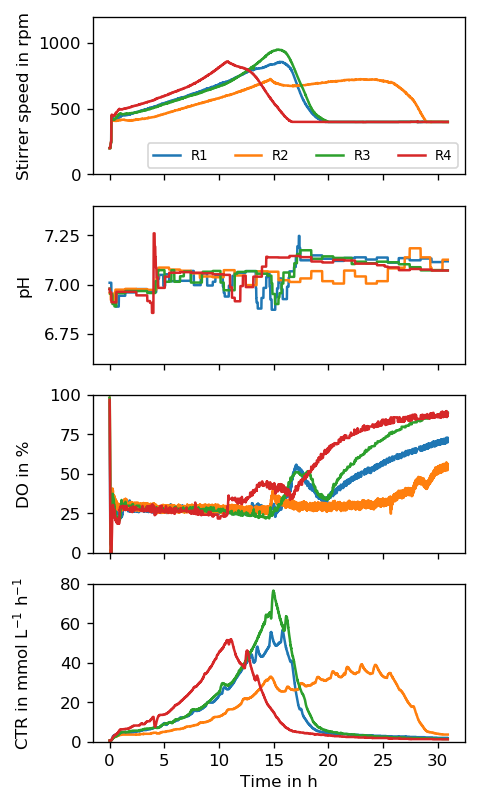

In [32]:
# Plotting of stirrer speed, pH, DO, CTR for all reactors
fig, ax = plt.subplots(4, 1, figsize=(4, 8), sharex=True, dpi=120)

# Here we iterate through the dict
for key, item in ddata.items():
    
    # "key" is the reactor number
    # "item" is the reactor data
    ax[0].plot(item.dataframe['process_time'], item.dataframe['stirrer_speed_pv'], label=f'R{key}')
    ax[1].plot(item.dataframe['process_time'], item.dataframe['ph_pv'], label=f'Reactor {key}')        
    ax[2].plot(item.dataframe['process_time'], item.dataframe['do_pv'], label=f'Reactor {key}')        
    ax[3].plot(item.dataframe['process_time'], item.dataframe['ctr_pv'], label=f'Reactor {key}')

# We define ylims, because we do not like the automatically set ones
ax[0].set_ylim(0, 1200)
ax[1].set_ylim(6.6, 7.4)
ax[2].set_ylim(0, 100)
ax[3].set_ylim(0, 80)

# Setting nice y_labels
ax[0].set_ylabel('Stirrer speed in rpm')
ax[1].set_ylabel('pH')
ax[2].set_ylabel('DO in %')
ax[3].set_ylabel('CTR in mmol L$^{-1}$ h$^{-1}$')
ax[3].set_xlabel('Time in h')

# Get a legend into the first subplot
ax[0].legend(ncol=4, fontsize=8, loc='lower right')

# Use a magic function to align the y_labels
fig.align_ylabels()